# Сначала определю библиотеки которые нужны мне

In [168]:
import numpy as np
import matplotlib.pyplot as plt

# Теперь константы

In [236]:
Nx, Ny, Nt = 100, 100, 100
X1, X2 = 0, 10
Y1, Y2 = 0, 5
T1, T2 = 0,  0.01

h_x=(X2-X1)/(Nx-1)
h_y=(Y2-Y1)/(Ny-2)
tau=(T2-T1)/(Nt-1)

x = np.linspace(X1,X2,Nx)
y = np.linspace(Y1-h_y/2,Y2+h_y/2,Ny) #второй порядок
#y = np.linspace(Y1,Y2,Ny) # первый порядок 
t = np.linspace(T1,T2,Nt)

gamma_1 = 4 * tau / (h_x*h_x)
gamma_2 = 4 * tau / (h_y*h_y)

u=np.zeros((Nx,Ny,Nt*2+1))

#начальное условие
for i in range(0,Nx):              
    for j in range(0,Ny):
        u[i,j,0]=np.sin(np.pi*x[i])*np.cos(2*np.pi*y[j])

# Теперь определю функции прогонки

## прогонка по х

In [230]:
def progonX(i2,j):
    
    d=np.zeros(Nx)             
    sigma = np.zeros(Nx)
    
    d[1] = 0           #условие Неймана - 1, условие Дирихле - 0
    sigma[1] = 0
    
    A = 0.5 * gamma_1
    B = 1 + gamma_1
    C = 0.5 * gamma_1
    
    for m in range (1,Nx-1):
        F_i1 = - (0.5 * gamma_2*(u[m,i2-1,j-1]+u[m,i2+1,j-1])+(1-gamma_2)*u[m,i2,j-1])
        d[m+1] = C / (B - A * d[m])  
        sigma[m+1] = (F_i1 - A * sigma[m]) / (A * d[m] - B)
    
    u[Nx-1,i2,j]= 0            #условие Дирихле
    for m in range(Nx-1,0,-1):                  
        u[m-1,i2,j]=d[m] * u[m,i2,j] + sigma[m]
    #u[Nx-1,i2,j]=0
    #u[0,i2,j] = 0

# прогонка по у

In [231]:
def progonY(i1,j):
    d=np.zeros(Ny)
    sigma = np.zeros(Ny)
    d[1] = 1            #условие Неймана - 1, условие Дирихле - 0
    sigma[1] = 0
    A = 0.5 * gamma_2
    B = 1 + gamma_2
    C = 0.5 * gamma_2
    for m in range (1,Ny-1):
        F_i2 = - (0.5 *gamma_1*(u[i1-1,m,j-1]+u[i1+1,m,j-1])+(1-gamma_1)*u[i1,m,j-1]) 
        d[m+1] = C / (B - A * d[m])  
        sigma[m+1] = (F_i2 - A * sigma[m]) / (A * d[m] - B)
    
    u[i1,Ny-1,j]=sigma[-1]/(1-d[-1])            
    for m in range(Ny-1,0,-1):                  
        u[i1,m-1,j]=d[m] * u[i1,m,j] + sigma[m] #цикл доходит до первого типа и все норм
    u[i1,Ny-1,j]= u[i1,Ny-2,j]

# Численное решение задачи

In [232]:
for j in range(1,2*Ny,2):
    for i2 in range(1,Ny-1):
        progonX(i2,j)
    for i1 in range(1,Nx-1):
        progonY(i1,j+1)

# Аналитическое решение задачи

In [233]:
z=np.zeros((Nx,Ny,Nt*2+1))

for i in range(0,Nx):              
    for j in range(0,Ny):
        for it in range(0,Nt):
            z[i,j,it]=np.sin(np.pi*x[i])*np.cos(2*np.pi*y[j])*np.exp(-20*(np.pi ** 2)*it*tau)

# Перейду к графикам

## численное решение в начальный момент времени

<IPython.core.display.Javascript object>


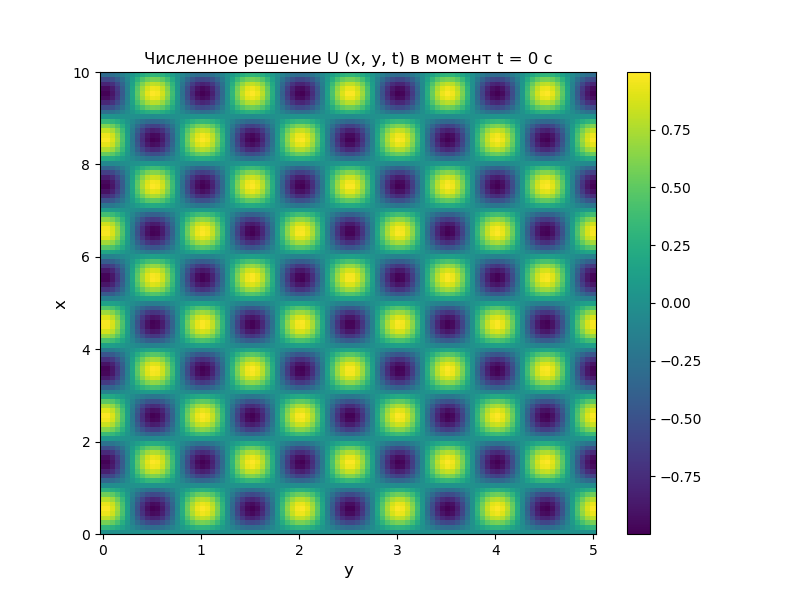

Text(0.5, 1.0, 'Численное решение U (x, y, t) в момент t = 0 c')

In [181]:
        
fig = plt.figure(figsize = (8,6))
plt.pcolormesh(y,x,u[:,:,0])
plt.colorbar()
plt.ylabel('х', fontsize =12)
plt.xlabel('y', fontsize =12)
plt.title('Численное решение U (x, y, t) в момент t = 0 c')


## Аналитическое решение в начальный момент времени

<IPython.core.display.Javascript object>


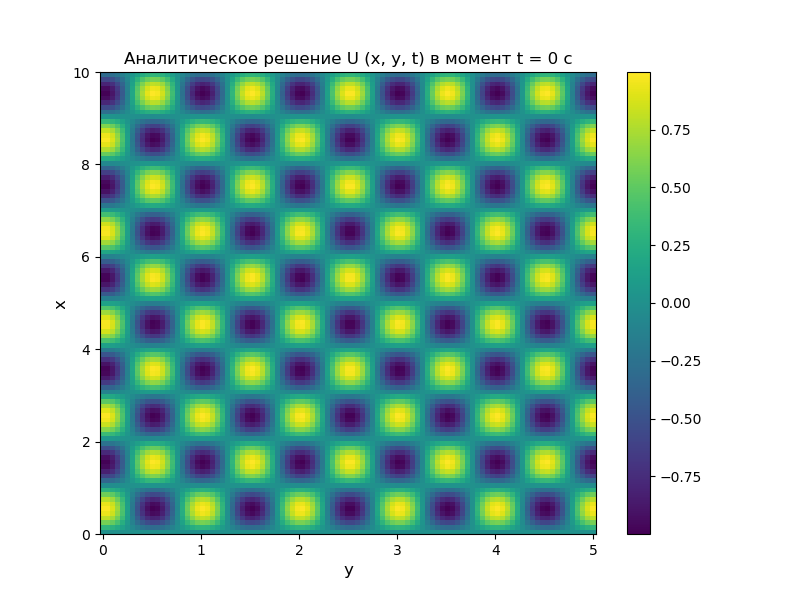

Text(0.5, 1.0, 'Аналитическое решение U (x, y, t) в момент t = 0 c')

In [182]:
            
fig = plt.figure(figsize = (8,6))
plt.pcolormesh(y,x,z[:,:,0])
plt.colorbar()
plt.ylabel('х', fontsize =12)
plt.xlabel('y', fontsize =12)
plt.title('Аналитическое решение U (x, y, t) в момент t = 0 c')

Ну тут глупо будет думать, что они отличаются, потому что в данных условиях я могу смело утверждать, что это тупо равно начальному условию задачи

## Численное решение при t = const

Пусть я выберу не время, а итерацию по времени. 

In [186]:
t_const = 25

### численное решение

<IPython.core.display.Javascript object>


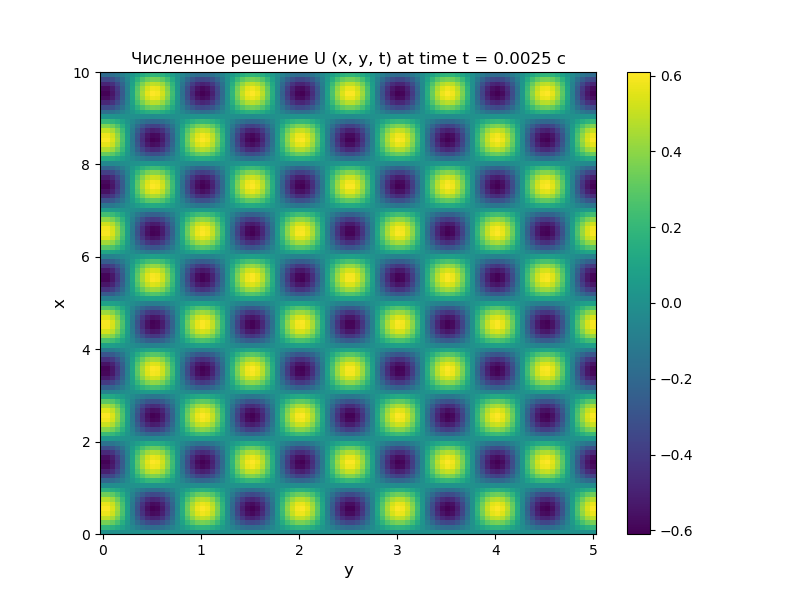

Text(0.5, 1.0, 'Численное решение U (x, y, t) at time t = 0.0025 c')

In [187]:
fig = plt.figure(figsize = (8,6))
plt.pcolormesh(y,x,u[:,:,2 * t_const])
plt.colorbar()
plt.ylabel('х', fontsize =12)
plt.xlabel('y', fontsize =12)
plt.title('Численное решение U (x, y, t) at time t = ' +  str(round(t_const * tau,4)) + ' c')

### аналитическое решение

<IPython.core.display.Javascript object>


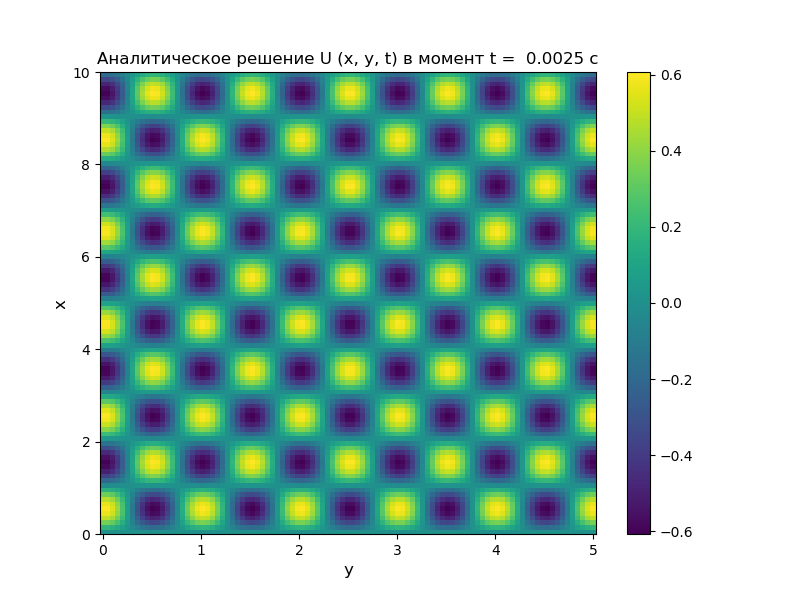

Text(0.5, 1.0, 'Аналитическое решение U (x, y, t) в момент t =  0.0025 с')

In [188]:
fig = plt.figure(figsize = (8,6))
plt.pcolormesh(y,x,z[:,:,t_const])
plt.colorbar()
plt.ylabel('х', fontsize =12)
plt.xlabel('y', fontsize =12)
plt.title('Аналитическое решение U (x, y, t) в момент t =  '+str(round(t_const * tau,4)) + ' с')

 ### невязка

<IPython.core.display.Javascript object>


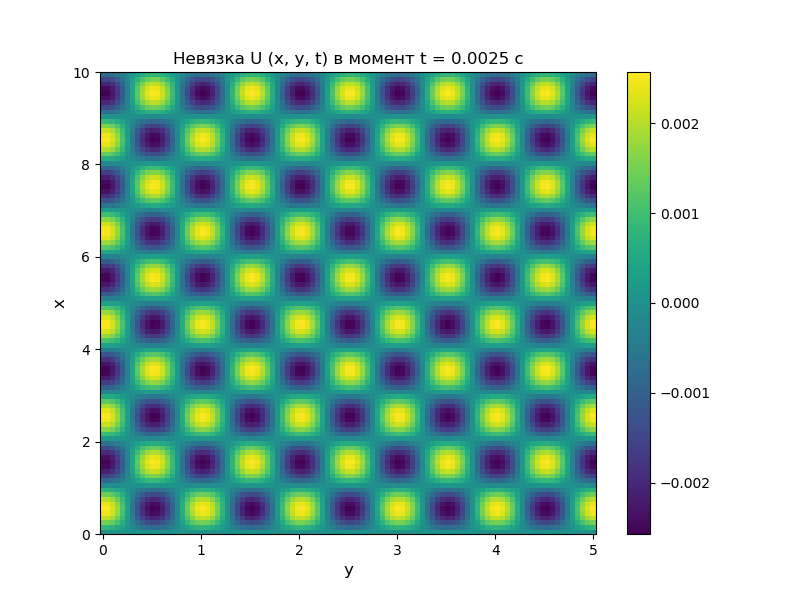

Text(0.5, 1.0, 'Невязка U (x, y, t) в момент t = 0.0025 с')

In [190]:
fig = plt.figure(figsize = (8,6))
plt.pcolormesh(y,x,u[:,:,2 * t_const] - z[:,:,t_const])
plt.colorbar()
plt.ylabel('х', fontsize =12)
plt.xlabel('y', fontsize =12)
plt.title('Невязка U (x, y, t) в момент t = ' +str(round(t_const * tau,4)) + ' с')

Как я вижу из графиков, невязка сильно меньше чем решение.

Для любителей $ 3D $ графиков

<IPython.core.display.Javascript object>


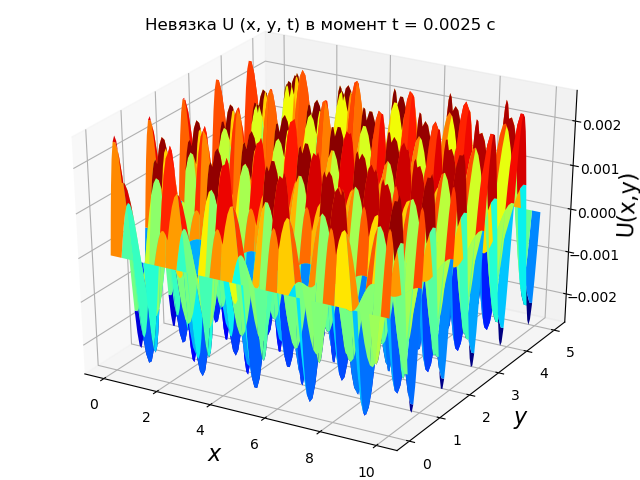

In [223]:
%matplotlib notebook
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

fig = pylab.figure()
axes = Axes3D(fig)

x1,y1 = np.meshgrid(x,y)

axes.plot_surface(x1, y1, u[:,:,2 * t_const]- z[:,:,t_const], rstride=4, cstride=4, cmap = cm.jet)

pylab.xlabel('$x$', size=16)
pylab.ylabel('$y$', size=16)
axes.set_zlabel('U(x,y)', size = 16)
pylab.title('Невязка U (x, y, t) в момент t = ' +str(round(t_const * tau,4)) + ' с')

pylab.show()


Порядок точности по координатам и времени второй. Порядок точности схемы второй.

### Невязка в случае аппроксимации граничного условия Неймана разностной производной, обеспечивающей лишь первый порядок аппроксимации.

<IPython.core.display.Javascript object>


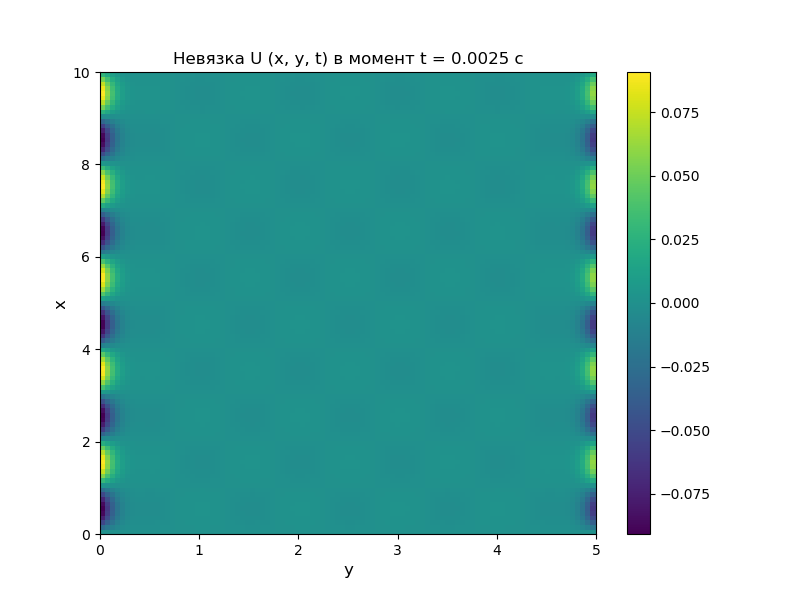

Text(0.5, 1.0, 'Невязка U (x, y, t) в момент t = 0.0025 с')

In [234]:
fig = plt.figure(figsize = (8,6))
plt.pcolormesh(y,x,u[:,:,2 * t_const] - z[:,:,t_const])
plt.colorbar()
plt.ylabel('х', fontsize =12)
plt.xlabel('y', fontsize =12)
plt.title('Невязка U (x, y, t) в момент t = ' +str(round(t_const * tau,4)) + ' с')

Для любителей $ 3D $ графиков

<IPython.core.display.Javascript object>


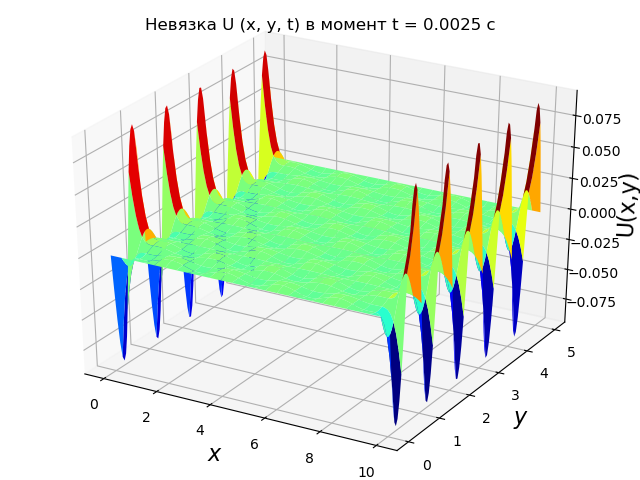

In [235]:
%matplotlib notebook
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

fig = pylab.figure()
axes = Axes3D(fig)

x1,y1 = np.meshgrid(x,y)

axes.plot_surface(x1, y1, u[:,:,2 * t_const]- z[:,:,t_const], rstride=4, cstride=4, cmap = cm.jet)

pylab.xlabel('$x$', size=16)
pylab.ylabel('$y$', size=16)
axes.set_zlabel('U(x,y)', size = 16)
pylab.title('Невязка U (x, y, t) в момент t = ' +str(round(t_const * tau,4)) + ' с')

pylab.show()

Порядок точности по координате $y$ первый. Поэтому порядок точности схемы первый.

## Численное решение при $x = const$

Для простоты я просто выберу итерацию

In [194]:
x_const = 30

У меня тут могут возникнуть проблемы в связи с тем, что у меня сохранен в матрице половинный слой, а его показывать не хочется, поэтому введу новый массив, в который пересохраню только значения в целых слоях по времени.

In [196]:
u2=np.zeros((Nx,Ny,Nt))

for i in range(0,Nx):              
    for j in range(0,Ny):
        for it in range(0,Nt):
            u2[i,j,it]=u[i,j,2*it]

<IPython.core.display.Javascript object>


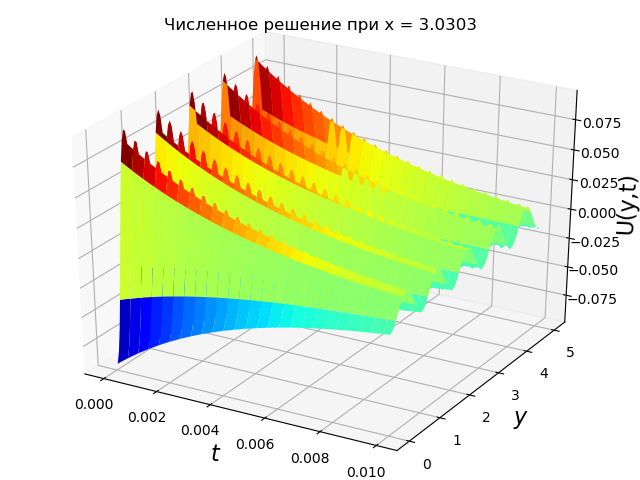

In [221]:
fig = pylab.figure()
axes = Axes3D(fig)

t1,y1 = np.meshgrid(t,y)

axes.plot_surface(t1, y1, u2[x_const,:,:], rstride=4, cstride=4, cmap = cm.jet)
pylab.xlabel('$t$', size=16)
pylab.ylabel('$y$', size=16)
axes.set_zlabel('U(y,t)', size = 16)
pylab.title('Численное решение при х = ' + str(round(h_x * x_const,4)))
#pylab.zlabel('$U(y,t)$')

pylab.show()

##### волна бежит делает буль-буль

## Численное решение при $y = const$

In [198]:
y_const = 50

<IPython.core.display.Javascript object>


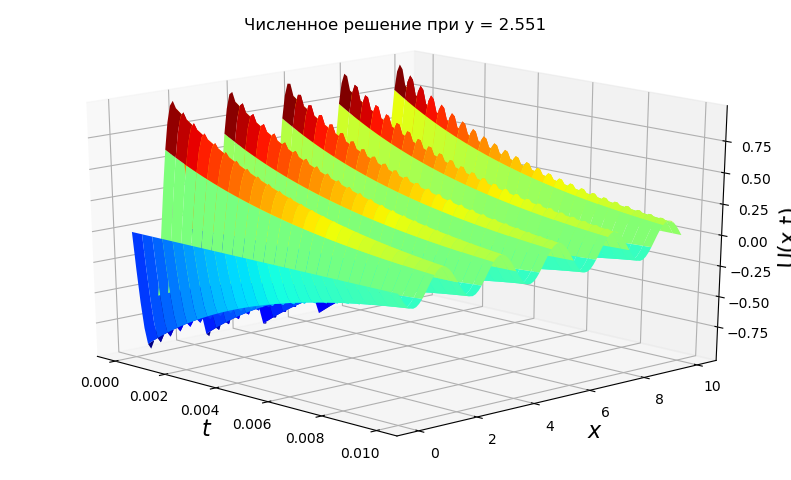

In [222]:
fig = pylab.figure()
axes = Axes3D(fig)

x1,t1 = np.meshgrid(t,x)

axes.plot_surface(x1, t1, u2[:,y_const,:], rstride=4, cstride=4, cmap = cm.jet)

pylab.xlabel('$t$', size=16)
pylab.ylabel('$x$', size=16)
axes.set_zlabel('U(x,t)', size = 16)
pylab.title('Численное решение при y = ' + str(round(h_y * y_const,4)))

pylab.show()

##### бульбулятор

можно было б повертеть, если бы у вас был установлен юпитер :)